Лабораторын ажил 7: Centrality & Assortative Mixing*

B221910035 M.Temuulen

Энэ долоо хоногийн лабораторын ажлаар бид зангилааны гол хэмжүүрүүд болох
centrality болон assortative mixing -ийн талаар судлах, кодчилох болно.
Note: Уг нотебүүк нь 100 хувь болон гүйцэт биш бөгөөд цаашид нэмэн судлахад шаардлагатай зөвхөн анхан шатны ойлголтуудыг багтаасан болно.


In [ ]:
import networkx as nx  # График ба сүлжээг бүтээх, шинжлэх, дүрслэхэд ашигладаг networkx номын санг оруулж байна
import warnings  # Анхааруулга гаргах номын санг оруулж байна
import numpy as np  # Тооцоолол хийхэд ашигладаг numpy номын санг оруулж байна
import random  # Санамсаргүй тоо болон жагсаалтаас санамсаргүй элемент сонгох номын санг оруулж байна
import matplotlib.pyplot as plt  # График болон дүрслэл үүсгэх matplotlib.pyplot номын санг оруулж байна
import matplotlib.colors as mcolors  # Өнгө болон өнгийн схемүүдтэй ажиллах matplotlib.colors номын санг оруулж байна

warnings.filterwarnings('ignore')  # Анхааруулгуудыг гаргахгүй байхаар тохируулах


In [ ]:
import networkx as nx  # NetworkX номыг импортлох, графийн өгөгдлүүдийг боловсруулахад ашиглагддаг.
import os  # Тухайн файлын замуудтай ажиллах модуль.

#(файлын замууд)
nodes_csv = "/content/asoiaf-book1-nodes.csv"  # Нодын (төрөл бүрийн өгөгдлийн) CSV файл.
edges_csv = "/content/asoiaf-book1-edges.csv"  # Холболтын (рёүдөгийн) CSV файл.

def read_net(edges_path):
    g = nx.Graph()  # NetworkX-граф үүсгэх
    with open(edges_path, "r") as f:  # Холболтын CSV файл нээж унших
        f.readline()  # Анхны мөр (хедер)ыг хаяна
        for line in f:  # Бүх мөрийг уншиж, граф дээр холболт (edge) нэмэх
            nodes = line.strip().split(",")  # Мөрийг заагчийг нь (",") хуваах
            if len(nodes) >= 2:  # 2 ба түүнээс олон утга байгаа бол
                g.add_edge(nodes[0].strip(), nodes[1].strip())  # Холболтыг (edge) граф руу нэмэх
    return g  # Графийг буцаах

#(Өгөгдлийг унших)
g = read_net(edges_csv)  # Холболтын файл уншиж, граф үүсгэх

#(House 정보) (Нодын шинж чанарыг нэмэх, энэ тохиолдолд 'house' мэдээлэл)
houses = {}  # Нодын байр (house) мэдээллийг хадгалах толь
if os.path.exists(nodes_csv):  # Файл орших эсэхийг шалгах
    with open(nodes_csv, "r") as f:  # Нодын CSV файл унших
        f.readline()  # Анхны мөрийг хаяна
        for line in f:  # Бүх мөрийг уншиж, тухайн нодын хүндэтгэлийг хадгалах
            parts = line.strip().split(",")  # Мөрийг заагчийг нь хуваах
            if len(parts) >= 3:  # 3 ба түүнээс олон утга байгаа бол
                node, _, house = parts  # Нод болон байр (house)-г авах
                houses[node] = house  # Нод ба байр мэдээллийг хадгалах
                if node in g.nodes:  # Хэрэв энэ нод графд байгаа бол
                    g.nodes[node]["house"] = house  # Нодын 'house' шинж чанарыг нэмэх

# График дүрслэлийн хувьд нодын байрлал тохируулах
if len(g.nodes) > 0:  # Граф дээр нод байна уу?
    pos = nx.spring_layout(g)  # Нодын байрлалыг spring layout ашиглан тооцоолох


In [ ]:
from google.colab import drive  # Google Colab-д Drive-ийг холбох модулыг импортлох
drive.mount('/content/drive')  # Google Drive-ыг "/content/drive" замд холбох

Mounted at /content/drive


In [ ]:
def draw_net(G, pos, measures, measure_name):
    plt.figure(figsize=(10, 10))  # Графикийг 10x10 хэмжээтэй зураглал хийх

    # Нодыг дүрслэх
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,  # Нодын хэмжээ, өнгөний схем
                                   node_color=list(measures.values()),  # Нодын өнгийг measures-ийн утгаар тохируулах
                                   nodelist=measures.keys())  # measures-ийн түлхүүрүүдийг ашиглан зөвхөн эдгээр нодыг дүрслэх

    # Өнгөний хэмжээг тохируулах (SymLogNorm)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))  # Өнгөний хамаарлыг тохируулах

    # Нодын нэрсийг дүрслэх
    labels = nx.draw_networkx_labels(G, pos)  # Нодын нэрсийг байрлуулна

    # Эдгүүдийг дүрслэх
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)  # Эдгүүдийн харагдах байдлыг тохируулах (transparency)

    # Графикийн гарчиг
    plt.title(measure_name)  # Графикт байрлах гарчиг

    # Өнгөний масштабтай цолбар гаргах
    plt.colorbar(nodes)  # Нодын өнгийн спектрийг нэмэх (харгалзах өнгөний диаграм)

In [ ]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5]

[('Eddard-Stark', 66),
 ('Robert-Baratheon', 50),
 ('Tyrion-Lannister', 46),
 ('Catelyn-Stark', 43),
 ('Jon-Snow', 37)]

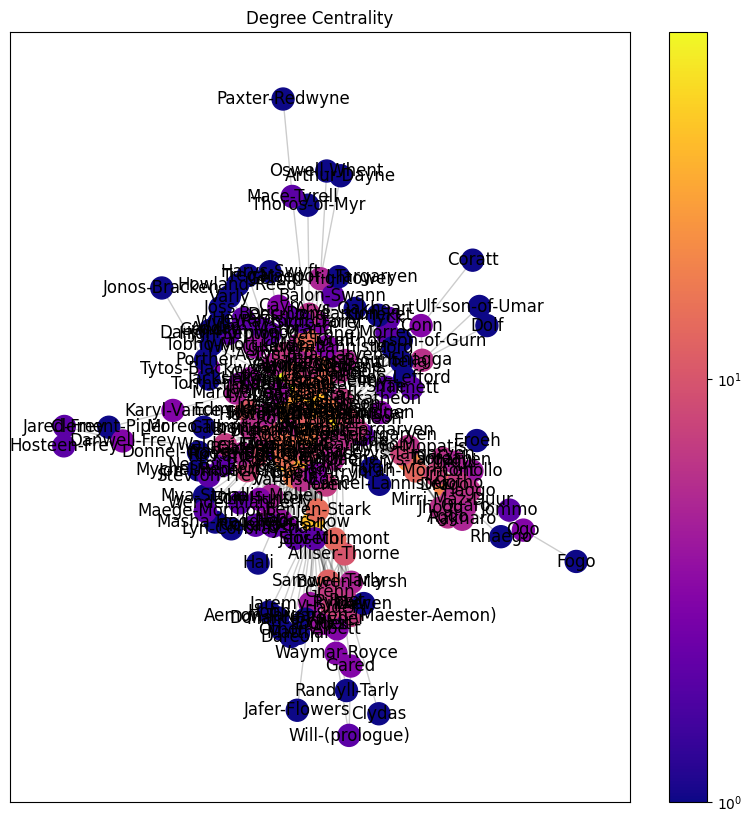

In [ ]:
draw_net(g, pos, degrees, 'Degree Centrality')

In [ ]:
closeness = nx.closeness_centrality(g) # compute the closeness centraliry of all node

In [ ]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('Eddard-Stark', 0.5636363636363636),
 ('Robert-Baratheon', 0.5454545454545454),
 ('Tyrion-Lannister', 0.510989010989011),
 ('Catelyn-Stark', 0.5054347826086957),
 ('Robb-Stark', 0.49732620320855614)]

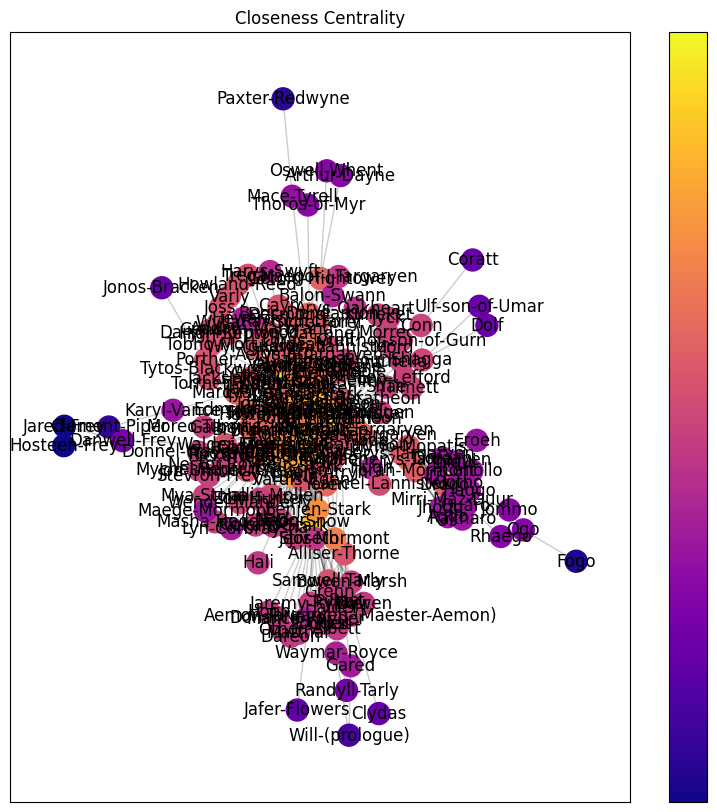

In [ ]:
draw_net(g, pos, closeness, 'Closeness Centrality')

In [ ]:
betweenness = nx.betweenness_centrality(g) # compute the betweenness centraliry of al

PART2

In [ ]:
import networkx as nx  # Networkx номын санг график үүсгэх, шинжлэх, дүрслэхэд ашиглана
import pandas as pd  # Pandas номын санг өгөгдлийн хүрээтэй ажиллахад ашиглана

# Тохиромжгүй график үүсгэх
G = nx.Graph()  # Undirected график үүсгэх
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]  # Ирмэгүүдийн жагсаалт
G.add_edges_from(edges)  # Ирмэгүүдийг графикт нэмэх

# Градийн төвшний хүндийг тооцоолох
degree_centrality = nx.degree_centrality(G)

# Үр дүнг хэвлэх
print("Тамирчингүй графикт градийн төвшний хүндийн үр дүн:")
for node, centrality in degree_centrality.items():
    print(f"Зангилаа {node}: {centrality}")  # Зангилааны хүндийг хэвлэх

# Чиглэлтэй график үүсгэх
DG = nx.DiGraph()  # Directed график үүсгэх
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]  # Ирмэгүүдийн жагсаалт
DG.add_edges_from(edges)  # Ирмэгүүдийг чиглэлтэй графикт нэмэх

# Орсон ба гарсан градийн түвшний хүндийг тооцоолох
in_degree_centrality = nx.in_degree_centrality(DG)  # Орсон градийн түвшний хүндийг
out_degree_centrality = nx.out_degree_centrality(DG)  # Гарсан градийн түвшний хүндийг

# Үр дүнг хэвлэх
print("\nЧиглэлтэй графикт орсон градийн төвшний хүндийн үр дүн:")
for node, centrality in in_degree_centrality.items():
    print(f"Зангилаа {node}: {centrality}")  # Зангилааны орсон градийн хүндийг хэвлэх

print("\nЧиглэлтэй графикт гарсан градийн төвшний хүндийн үр дүн:")
for node, centrality in out_degree_centrality.items():
    print(f"Зангилаа {node}: {centrality}")  # Зангилааны гарсан градийн хүндийг хэвлэх

# Жишээ өгөгдлийн багц унших (файлын байршлыг зөв шалгаарай)
try:
    df = pd.read_csv("twitter_network.csv")  # Жишээ файл

    # Чиглэлтэй график үүсгэх
    twitter_graph = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())  # Twitter сүлжээний график

    # Градийн түвшний хүндийг тооцоолох
    degree_centrality = nx.degree_centrality(twitter_graph)

    # Топ 10 нөлөө бүхий хэрэглэгчийг олох
    top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

    print("\nГрадийн төвшний хүндийн дагуу Топ 10 Нөлөө бүхий Хэрэглэгчид:")
    for node, centrality in top_influencers:
        print(f"Хэрэглэгч {node}: {centrality}")  # Топ 10 хэрэглэгчийн хүндийг хэвлэх

except FileNotFoundError:
    print("\nАлдаа: 'twitter_network.csv' файл олдсонгүй. Зөв байршилыг оруулна уу.")  # Хэрэв файл олдохгүй бол алдааг хэвлэх


Тамирчингүй графикт градийн төвшний хүндийн үр дүн:
Зангилаа 1: 0.5
Зангилаа 2: 0.75
Зангилаа 3: 0.75
Зангилаа 4: 0.75
Зангилаа 5: 0.25

Чиглэлтэй графикт орсон градийн төвшний хүндийн үр дүн:
Зангилаа 1: 0.25
Зангилаа 2: 0.25
Зангилаа 3: 0.25
Зангилаа 4: 0.25
Зангилаа 5: 0.25

Чиглэлтэй графикт гарсан градийн төвшний хүндийн үр дүн:
Зангилаа 1: 0.25
Зангилаа 2: 0.25
Зангилаа 3: 0.5
Зангилаа 4: 0.25
Зангилаа 5: 0.0

Градийн төвшний хүндийн дагуу Топ 10 Нөлөө бүхий Хэрэглэгчид:
Хэрэглэгч user1: 0.2857142857142857
Хэрэглэгч user2: 0.2857142857142857
Хэрэглэгч user7: 0.2857142857142857
Хэрэглэгч user3: 0.2857142857142857
Хэрэглэгч user4: 0.2857142857142857
Хэрэглэгч user5: 0.2857142857142857
Хэрэглэгч user6: 0.2857142857142857
Хэрэглэгч user8: 0.2857142857142857
